In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Iris.csv")
X = df.drop(columns = ['Species'])
Y = df.drop(columns = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm',	'Species'])

In [ ]:
model = KMeans(n_clusters = 3)
model.fit(X)
preds = model.predict(X)
preds

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
sm.accuracy_score(Y, model.labels_)*100

0.006666666666666667

In [ ]:
cm = confusion_matrix(Y, model.labels_)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xx = scaler.transform(X)
Xx = pd.DataFrame(xx, columns = X.columns)
X= Xx

In [ ]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(X)
y_cluster_gmm = gmm.predict(X)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
sm.accuracy_score(Y, y_cluster_gmm)

0.006666666666666667

In [ ]:
cm = confusion_matrix(Y, y_cluster_gmm)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [ ]:
plt.figure(figsize = (14, 7))
colormap = np.array(['red', 'lime', 'black'])

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'GMM Classification')

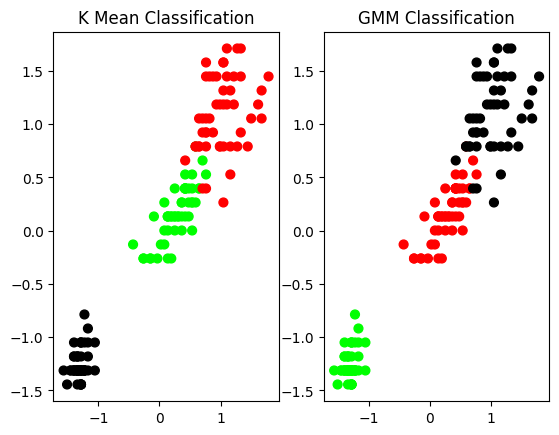

In [ ]:
plt.subplot(1,2,1)
plt.scatter(X.PetalLengthCm, X.PetalWidthCm, c = colormap[preds], s = 40)
plt.title('K Mean Classification')
plt.subplot(1,2,2)
plt.scatter(X.PetalLengthCm, X.PetalWidthCm, c = colormap[y_cluster_gmm], s = 40)
plt.title('GMM Classification')

In [ ]:
# plt.subplot(1,2,2)
# plt.scatter(X.PetalLengthCm, X.PetalWidthCm, c = colormap[y_cluster_gmm], s = 40)
# plt.title('GMM Classification')